# Project 3 - Part 2 EDA, Data Cleaning
by: Nah Wei Jie

---

## Table of Contents
This project is broken down into 3 different parts, each with it's accompanying notebook.

**Part 1**

- Web scraping  

**Part 2**

- Exploratory Data Analysis
- Data Cleaning
- Visualizations  

**Part 3** 
- Pre-processing
- Model Fit and Testing
- Model Iteration
- Model Evaluation
    

---

## Library Imports

In [1]:
# Standard imports
import pandas as pd # Version 1.2.4
import numpy as np # Version 1.20.1
import time
import random

# Set pandas to display a maximum of 400 characters in the column
pd.options.display.max_colwidth = 400
pd.set_option('display.max_rows', 100)

# Datetime imports
from datetime import datetime
from dateutil import tz

# Visualization imports
import seaborn as sns # Version 0.11.1
import matplotlib.pyplot as plt # Version 3.3.4

# Matplotlib settings
small = 12
medium = 15
large = 20

plt.rc('font', size=small)          # controls default text sizes
plt.rc('axes', titlesize=small)     # fontsize of the axes title
plt.rc('axes', labelsize=medium)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=small)    # fontsize of the tick labels
plt.rc('ytick', labelsize=small)    # fontsize of the tick labels
plt.rc('legend', fontsize=small)    # legend fontsize
plt.rc('figure', titlesize=large)  # fontsize of the figure title

In [2]:
# NLP imports
import regex as re # Version 2.5.93
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import spacy # Version 3.2.3
sp = spacy.load('en_core_web_sm') 

# Modelling Imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Ignore warnings
import warnings
def ignore_warn(*args,**kwargs):
    pass
warnings.warn=ignore_warn

---

## Import Data

In [4]:
# Loading in our saved .csv files from notebook 1 
df_fanfic = pd.read_csv('../datasets/fanfic.csv')
df_lifeadv = pd.read_csv('../datasets/lifeadv.csv')

## EDA

In [5]:
# Displays the first 5 rows of data
df_fanfic.head()
## Click the ... bubble to see output

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,...,removed_by_category,post_hint,preview,poll_data,author_cakeday,crosspost_parent,crosspost_parent_list,url_overridden_by_dest,call_to_action,category
0,[],False,GreeneyedSigma,ocdlinker,[],508529a4-fbf1-11e0-8d2d-12313b071981,AO3 Greeneyedsigma,dark,text,t2_2c04jkkv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,jisungsunshine,NaN,[],NaN,NaN,NaN,text,t2_fgmkva1h,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,nochugotchim,NaN,[],NaN,NaN,NaN,text,t2_3o6zv4qk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,Eomercin,mblu,[],82250558-0ded-11ea-8921-0e7e60fadb45,AzafuseYugi / AO3 / FFN,light,text,t2_l2g9c9r,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,EmilyAnn2020,NaN,[],NaN,NaN,NaN,text,t2_je7kbt0d,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Displays the first 5 rows of data
df_lifeadv.head()
## Click the ... bubble to see output

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,whitelist_status,wls,author_cakeday,removed_by_category,post_hint,preview,crosspost_parent,crosspost_parent_list,url_overridden_by_dest,distinguished
0,[],False,purplezebra62,NaN,[],NaN,text,t2_5aolzj07,False,False,...,no_ads,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Timely-Ad4772,NaN,[],NaN,text,t2_ar9k34m6,False,False,...,no_ads,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,dapin98,NaN,[],NaN,text,t2_45ab6ua6,False,False,...,no_ads,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,MichaelScott2003,NaN,[],NaN,text,t2_py655q1,False,False,...,no_ads,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,dillonmcyds,NaN,[],NaN,text,t2_bdxxsktv,False,False,...,no_ads,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(f'FanFiction Dataframe Shape: {df_fanfic.shape}')
print(f'LifeAdvice Dataframe Shape: {df_lifeadv.shape}')

FanFiction Dataframe Shape: (998, 76)
LifeAdvice Dataframe Shape: (1000, 69)


Mentioned in notebook 1, we have slightly more entries in the LifeAdvice dataframe compared to FanFiction. The number of columns between the two dataframes are different as well which is expected given that different subreddits might have differents rules and features for their posts. Moving on we will identify columns which are interesting to us and ensure that both the dataframes have them, before that we will explore which are the columns which exist in only one of the dataframes.

In [8]:
# Display column names of the Fanfiction Dataframe
df_fanfic.columns
## Click the ... bubble to see output

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext',
       'author_flair_template_id', 'author_flair_text',
       'author_flair_text_color', 'author_flair_type', 'author_fullname',
       'author_is_blocked', 'author_patreon_flair', 'author_premium',
       'awarders', 'can_mod_post', 'contest_mode', 'created_utc', 'domain',
       'full_link', 'gildings', 'id', 'is_created_from_ads_ui',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_css_class',
       'link_flair_richtext', 'link_flair_template_id', 'link_flair_text',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media_only',
       'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'retrieved_on', 'score', 'selftext', 'send_replies', 'spo

In [9]:
# Display column names of the LifeAdvice Dataframe
df_lifeadv.columns
## Click the ... bubble to see output

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_is_blocked',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_created_from_ads_ui', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
       'is_self', 'is_video', 'link_flair_background_color',
       'link_flair_richtext', 'link_flair_template_id', 'link_flair_text',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media_only',
       'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'retrieved_on', 'score', 'selftext', 'send_replies', 'spoiler',
       'stickied', 'subreddit', 'subreddit_id', 'subreddit_subscribers',
       'subre

In [10]:
# Check column names of one subreddit against the other and returns those present in one but not the other
print('Columns which are unique to FanFiction Subreddit:')  
for x in df_fanfic.columns.tolist():
    if x not in df_lifeadv.columns.tolist():
        print(x)

print('\n')

print('Columns which are unique to LifeAdvice Subreddit:')
for x in df_lifeadv.columns.tolist():
    if x not in df_fanfic.columns.tolist():
        print(x)

# Click the ... bubble below to see the columns unique to each subreddit

Columns which are unique to FanFiction Subreddit:
author_flair_template_id
author_flair_text_color
link_flair_css_class
author_flair_background_color
suggested_sort
poll_data
call_to_action
category


Columns which are unique to LifeAdvice Subreddit:
distinguished


It seems that the columns which are present in only one of the dataframes are not very useful
in providing us information to identify which subreddit they belong to. After looking at the columns of both dataframes, these stood out as the most important columns:

|Column Name|Description|
|-------|-----------|
|selftext|The body of the post|
|title|Title of the post |
|id|Unique post ID|
|subreddit|Identifies which subreddit post was from|

Aside from the three mentioned above these columns below could give us more insights:

|Column Name|Description|
|-------|-----------|
|author|Author of the post
|score|Score after totaling upvotes and downvotes|
|upvote_ratio|Upvote ratio of the post|
|total_awards_received|Number of awards received|
|num_comments|Number of comments|
|created_utc|Timestamp where the post was created|
|permalink|Hyperlink for a post (For easy accessibility)|


In [11]:
# Storing our selected columns in a list
cols = ['selftext','title','id','subreddit','author','score','upvote_ratio','total_awards_received','num_comments','permalink','created_utc']

In [12]:
# Updating dataframes with only selected columns displayed
df_fanfic = df_fanfic[cols]
df_lifeadv = df_lifeadv[cols]

In [13]:
# Checks for duplicate values in 'selftext','title' columns and returns the shape
df_fanfic[df_fanfic.duplicated(subset=['selftext','title'])].shape

(6, 11)

In [14]:
# Checks for duplicate values in 'selftext','title' columns and returns the shape
df_lifeadv[df_lifeadv.duplicated(subset=['selftext','title'])].shape

(3, 11)

We see that both subreddits do have a few duplicates (6 for FanFiction, 3 for LifeAdv), we will be dropping them as they constitute a very small percentage of data lost (~0.6% for FanFiction, 0.3% for LifeAdvice). 

In [15]:
# Drop duplicated rows identified in 'selftext', 'title' columns in place
df_fanfic.drop_duplicates(subset=['selftext','title'],inplace=True)
df_lifeadv.drop_duplicates(subset=['selftext','title'],inplace=True)

In [16]:
# Displays information about the Fanfiction dataframe
df_fanfic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 0 to 997
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   selftext               964 non-null    object 
 1   title                  992 non-null    object 
 2   id                     992 non-null    object 
 3   subreddit              992 non-null    object 
 4   author                 992 non-null    object 
 5   score                  992 non-null    int64  
 6   upvote_ratio           992 non-null    float64
 7   total_awards_received  992 non-null    int64  
 8   num_comments           992 non-null    int64  
 9   permalink              992 non-null    object 
 10  created_utc            992 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 93.0+ KB


In [17]:
# Displays information about the Fanfiction dataframe
df_lifeadv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   selftext               961 non-null    object 
 1   title                  997 non-null    object 
 2   id                     997 non-null    object 
 3   subreddit              997 non-null    object 
 4   author                 997 non-null    object 
 5   score                  997 non-null    int64  
 6   upvote_ratio           997 non-null    float64
 7   total_awards_received  997 non-null    int64  
 8   num_comments           997 non-null    int64  
 9   permalink              997 non-null    object 
 10  created_utc            997 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 93.5+ KB


### Observations
- It appears that 'created_utc' is in ```int64``` format, reading up more on the 'created_utc' we discover that the value is actually a UNIX time stamp. We will dive deeper into the data and see if we have to change its datatype.  

  
  - There are null values for 'selftext' in both dataframes.   
These seem like posts where users only posted a title but no post body. As we will combine both the selftext and title columns later on, we will deal with these null values by assigning them an empty string value```('')```. The reason for doing this instead of dropping them is because we feel that these titles might provide us with useful information that may aid us in identifying which subreddit they belong to.

In [18]:
# Checks the Fanfiction dataframe and returns the number of rows with null values in the 'selftext' column
df_fanfic['selftext'].isnull().sum()

28

In [19]:
# Checks the LifeAdvice dataframe and returns the number of rows with null values in the 'selftext' column
df_lifeadv['selftext'].isnull().sum()

36

In [20]:
# Fill 'selftext' null values with empty string
df_fanfic['selftext'] = df_fanfic['selftext'].fillna('')
df_lifeadv['selftext'] = df_lifeadv['selftext'].fillna('')

At this point we create another dataframe which is a combination of the dataframes of each subreddit, we will also create a new 'subreddit_cat' columns using the .map function to map posts from 'subreddit' column values of 'FanFiction' to 1 and 'LifeAdvice' to 0.

In [21]:
# Combine our dataframes
master_df = df_fanfic.append(df_lifeadv)

In [22]:
master_df['subreddit'].value_counts(normalize = True)

LifeAdvice    0.501257
FanFiction    0.498743
Name: subreddit, dtype: float64

Looking at the normalized value counts, our dataset looks balanced
with ~ 50.1% of posts belonging to the 'LifeAdvice' subreddit and ~49.9% of posts belonging to the 'FanFiction' subreddit.

In [23]:
# Map our positive class as LifeAdvice:1, negative class as FanFiction:0
master_df['subreddit_cat'] = master_df['subreddit'].map({'LifeAdvice': 1, 'FanFiction': 0})

## Datetime columns

### Unpacking 'created_utc'


Reading up on our 'created_utc' columns, while useful for computer systems to track and sort dated information, it is not very intuitive for us to comprehend and perform analysis on. We can convert it into a more readable format using the ```datetime``` and ```tz``` into a more readable format and into a timezone of our choosing.

Further reading up this topic, it seems that in future, ["The Unix Time Stamp will cease to work due to a 32-bit overflow."](https://www.unixtimestamp.com/)   
**Before this moment millions of applications will need to either adopt a new convention for time stamps or be migrated to 64-bit systems which will buy the time stamp a "bit" more time.**  

When we revisit/re-iterate this project in future, we have to take note of any changes regarding Unix Time Stamp as it may affect our project.

In [24]:
# Converting 'created_utc' into timestamp using datetime and timezone(tz)
master_df['timestamp'] = master_df['created_utc'].apply(lambda x: datetime.fromtimestamp(x)) # Using datetime to convert unix timestamp values into 'YYYY/MM/DD, HH:MM:SS, timezone' format in 'timestamp' column
master_df['timestamp'] = master_df['timestamp'].dt.tz_localize('UTC') # Changes time standard to UTC
master_df['timestamp'] = master_df['timestamp'].dt.tz_convert('US/Eastern') # Sets time zone to US/Eastern relative to UTC

# From our timestamp column, we are now better able to extract more information from with regards to date and time,
# We will create columns for the following from the timestamp and their derivatives

master_df['day_posted'] = master_df['timestamp'].apply(lambda x: x.date())
master_df['time_posted'] = master_df['timestamp'].apply(lambda x: x.time())
master_df['month_posted'] = master_df['day_posted'].apply(lambda x: x.month)
master_df['weekday_posted'] = master_df['day_posted'].apply(lambda x: x.weekday())
master_df['hour_posted'] = master_df['time_posted'].apply(lambda x: x.hour)


Checking date ranges for both subreddits,

In [25]:
# Storing filtered dataframes for each subreddit as variables for easier referencing
df_fil_sub0 = master_df[master_df['subreddit_cat']==0] # DF showing posts from FanFiction subreddit
df_fil_sub1 = master_df[master_df['subreddit_cat']==1] # DF showing posts from LifeAdvice subreddit

In [26]:
# Generate descriptive statistics for timestamp column for fanfiction posts
df_fil_sub0['timestamp'].describe()

count                           992
unique                          983
top       2022-03-03 13:30:10-05:00
freq                              3
first     2022-02-27 00:58:26-05:00
last      2022-03-08 07:28:42-05:00
Name: timestamp, dtype: object

In [27]:
# Generate descriptive statistics for timestamp column for lifeadvice posts
df_fil_sub1['timestamp'].describe()

count                           997
unique                          997
top       2022-02-15 13:09:26-05:00
freq                              1
first     2022-01-21 09:46:58-05:00
last      2022-03-08 07:37:08-05:00
Name: timestamp, dtype: object

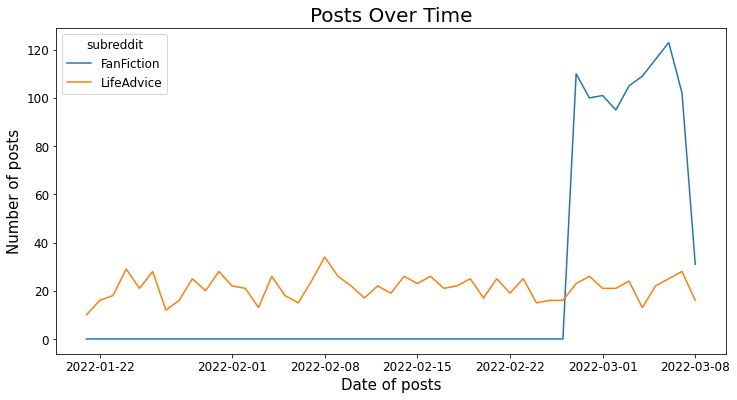

In [28]:
# Generate 'Posts Over Time' line plot with X as date of posts and Y as number of posts
pd.crosstab(index=master_df['day_posted'],columns=master_df['subreddit']).plot(kind='line',figsize=(12,6));
plt.title('Posts Over Time', fontsize = 20)
plt.ylabel('Number of posts')
plt.xlabel('Date of posts');


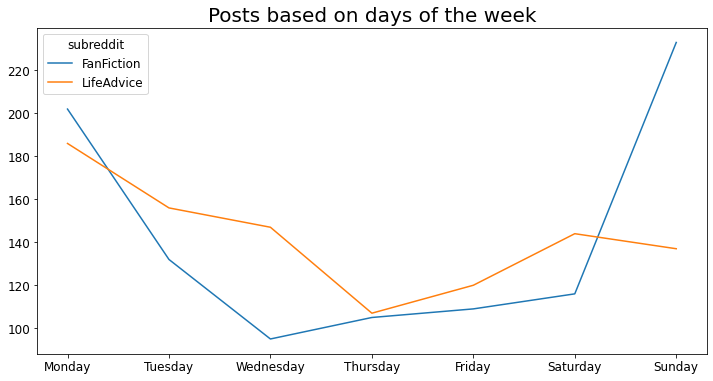

In [29]:
# Generate 'Posts based on days of the week' line plot with X as days of the week and Y as number of posts
pd.crosstab(index=master_df['weekday_posted'],columns=master_df['subreddit']).plot(kind='line',figsize=(12,6));
plt.title('Posts based on days of the week',fontsize=20);
plt.xticks(ticks=sorted(master_df['weekday_posted'].unique()),labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel("");

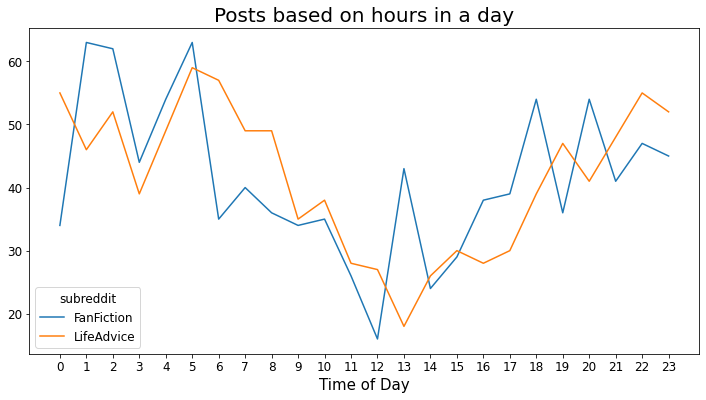

In [30]:
# Generate 'Posts based on times of a day' line plot with X as hours in a day and Y as number of posts
pd.crosstab(index=master_df['hour_posted'],columns=master_df['subreddit']).plot(kind='line',figsize=(12,6));
plt.title('Posts based on hours in a day',fontsize=20);
plt.xticks(ticks=range(24))
plt.xlabel("Time of Day");

### Observations
- Date range for "FanFiction" is from **27th February** to **8th March 2022**
- Date range for "LifeAdvice" is from **21th January** to **8th March 2022**
  
- We scraped our data with a starting date of 8th March 2022, scraping ~1000 posts spanned a duration of :
    - 9 days for the FanFiction subreddit
    - 46 days for the LifeAdvice subreddit
    
- From the graphs and descriptive statistics above, we can conclude that **"FanFiction" subreddit is ~5x more active than "LifeAdvice"** subreddit when it comes to the frequency of posts.

- Looking at the posts based on days of the week, it is quite interesting to see that on Tuesdays - Saturdays, we see a higher post frequency for LifeAdvice comapred to FanFiction despite being the smaller subreddit of the two in terms of the number of members inside.  

- Looking at the posts based on hours of the day, it seems that for both subreddits people tend to posts more in the night compared to the day, a possible explaination is that people tend to be in a more introspective mood at night compared to the day when they are at work or running errands.

The likely explaination for why this could be that posts from LifeAdvice are usually made by those facing problems or issues which feel unsolvable by posters or are seeking opinions from others before coming to a decision, hence posts are usually more impulsive in nature. Comparatively, posts made in FanFiction are probably more deliberate and lengthier in nature, often made by hobbyists or aspiring writers looking for feedback on their writing.

- The posts across hours (with time converted to US Eastern Standard Time) show that posts are most frequent late at night and early in the morning.

## Numeric columns

### Analyses of posts from each subreddit


Base on the conclusion from earlier analysis of date ranges, we posit that the Fanfiction subreddit is more active than LifeAdvice. With higher activity, it would likely correspond to higher average scores and number of comments when comparing posts between the two subreddits.

In [31]:
# Generate descriptive statistics for score column in fanfiction posts
df_fil_sub0['score'].describe()

count    992.000000
mean       1.003024
std        0.070967
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: score, dtype: float64

In [32]:
# Generate descriptive statistics for score column in lifeadvice posts
df_fil_sub1['score'].describe()

count    997.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: score, dtype: float64

It seems that we were unable to differentiate between posts from the two subreddits by looking at average score (both mean values were ~1).

### Top 5 posts based on score (total upvotes - total downvotes)

##### FanFiction

In [33]:
# Sorts posts based on score and return 5 rows with the highest scores
df_fil_sub0.sort_values('score',ascending=False)[['title','selftext','author','score','id','permalink']].head(5)
# CLick on the ... bubble to see the top 5 posts from the fanfiction subreddit

,title,selftext,author,score,id,permalink
702,"Authors, which is more difficult?","When a commenter posts a bunch of elaborate speculation, which is more difficult:\n\n* Is it harder to, when the commenter is wrong, to resist the urge correct them?\n\n* Or when they are right, is it harder to resist the urge to gush about the upcoming stuff?\n\nI know, either way it simply wouldn't do to spoil things, but when do you have the most difficulty in keeping your big flapping mout...",Mr_Blah1,2,t4djwe,/r/FanFiction/comments/t4djwe/authors_which_is_more_difficult/
253,Underappreciated?,"I'd love to have a look at your under-appreciated fics or chapters, link me up! Under 4k words would be nice. \n\nIf you leave a rec, try leave a review on a couple others. Let's spread the love folks. Fuck war.",theWalkingdread__,2,t7k0u8,/r/FanFiction/comments/t7k0u8/underappreciated/
41,Stories That Overlap- How to Write Them?,"So, to explain in very vague terms, I've had a brilliant idea for a story that overlaps with another WIP I'm writing. One storyline merges with the other (ie the two main characters meet and travel together). The problem is, I want to write it from both perspectives (3rd-person limited perspective so I want to write about how both of them feel but I'm not sure how to really handle that) and ...",Cheshire_Hancock,2,t8wipw,/r/FanFiction/comments/t8wipw/stories_that_overlap_how_to_write_them/
832,"By day I am ____, by night I am a fanfic author","Was wondering what goes on in the day of a typical fanfic author. What kind of vocations are you all in; do you ever find that the influence of your day job seeps into your writing sometimes?\n\nFor me, my work tends to require more concise writing. Ever since I’ve started working, then, I find that my fanfic writing has grown a lot less flowery (unfortunately). So am curious to see how divers...",suunao,2,t3eu1a,/r/FanFiction/comments/t3eu1a/by_day_i_am_by_night_i_am_a_fanfic_author/
0,Something I see a lot on this subreddit is...,"“How long should my chapters be?” \n\n“How many chapters should my fic be?” \n\n“How many words should my fic be?” \n\nEtc., Etc. \n\nI want to share something I’ve learned;\n\nDon’t worry about how many words you write.\n\nDon’t give yourself a word count minimum or a maximum. \n\nWrite however little or much it takes to tell your story. \n\nA world of stress and anxiety will be lifted off yo...",GreeneyedSigma,1,t98jj3,/r/FanFiction/comments/t98jj3/something_i_see_a_lot_on_this_subreddit_is/


##### LifeAdvice

In [34]:
# Sorts posts based on num_comments and return 5 rows with the highest scores
df_fil_sub1.sort_values('score',ascending=False)[['title','selftext','author','score','id','permalink']].head(5)
# CLick on the ... bubble to see the top 5 posts from the LifeAdvice subreddit

,title,selftext,author,score,id,permalink
0,How do I get out of a rut?,"It’s hard to describe but I feel like I’ve been in a funk as of recently. I’m bored with my daily life, not fulfilled by my job, couldn’t be more single, feel like I’m having trouble making and maintaining close friendships and am just overall not super happy. I am generally a very pessimistic person and I want to work on being more positive which I feel like will help attract more people into...",purplezebra62,1,t98osb,/r/LifeAdvice/comments/t98osb/how_do_i_get_out_of_a_rut/
671,idk what im doing anymore.,"I'm 19 and have had 6 jobs, only one of which I've been fired from. The issue with the other jobs is that I just lose all motivation after I've learnt how to do the job. I get my training done, work for a month (MAYBE) and then I just get so depressed with the routine and cant be asked anymore so I leave and looks elsewhere, but there seems to be nothing better. I hate it. Sometimes its so har...",-_Dare_-,1,slohk7,/r/LifeAdvice/comments/slohk7/idk_what_im_doing_anymore/
658,I'm 25 and have no idea what I need to do.,"I'm 25 years old and the past year has been incredibly difficult. I bought a house with some friends and now they're getting divorced and separating, I got covid on my birthday, my uncle, grandpa and dad all passed away last year. Dad and gramps within a few weeks of each other. I only saw my dad 1 time in the last 3 years because I was caught up in work. My partner broke up with me and moved ...",vengeful_fluffy,1,smcapc,/r/LifeAdvice/comments/smcapc/im_25_and_have_no_idea_what_i_need_to_do/
659,I’m 22 and I feel like I’ve missed out on certain things,"I’ve recently moved out from my parents house. Away from overprotective, controlling mother, away from distant, insecure step-father. Away from endless fights, which have seriously damaged my mental health. I had serious body image and self esteem issues, and struggled with anxiety and depression in my teen years - which should the years I make dumb mistakes, hurt and get hurt by other people ...",OnTheWayUp00,1,sm8g92,/r/LifeAdvice/comments/sm8g92/im_22_and_i_feel_like_ive_missed_out_on_certain/
660,At a crossroads in life right now.,"Currently a freshman in college right now, my parents are paying out of state with no scholarships. I failed a few classes in the first semester, the second semester has been going the same way. My parents have given me a few options.\nWithdrawal from college. I can work an internship in LA , Get a job and work and save money, Attend a gap year to a few different countries to discover and lear...",lol-stop,1,sm53et,/r/LifeAdvice/comments/sm53et/at_a_crossroads_in_life_right_now/


It seems very bizarre that posts with highest scores from both subreddits are less than 3 given both subreddits are sizeable we should expect to see at least some fluctuations in scores and number of comments between posts. I decided to look at the top post from each subreddit based on score 

##### Top post from Fanfiction
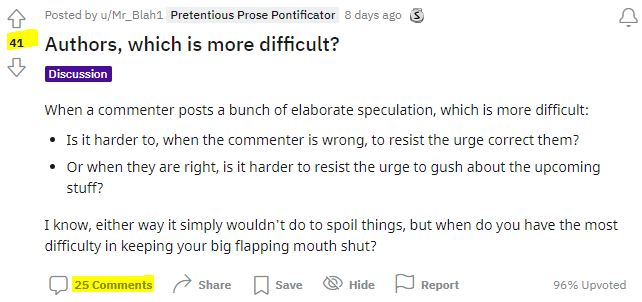

##### Top post from LifeAdvice
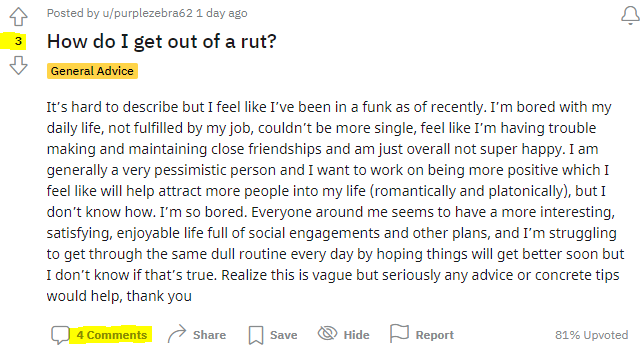

Contrary to what we see, the scores and number of coments which were indicated in the dataframe were not equal to those seen when looking at the post via the 'permalink' on Reddit.com itself.   

[**A possible explaination for this discrepancy could be that the scores and number of comments for these scraped posts API could have been 'cached' versions which were earlier versions of posts compared to the real-time data from Reddit**](https://github.com/pushshift/api/issues/74). 

This actually confirms our assumption that given higher activity levels between subreddits, it corresponds to higher average scores and number of comments between them, which were not reflected in the datasets. While for the scope of this project/ problem statement these differences which we were unable to capture for our model may not be very useful, it could prove to be a very useful differentiating factor for other problem statements.   
  
That being said it is important for us to keep such 'delays' in consideration in our data collection process which we can improve upon in future revisits/iterations. This is especially important if the problem statement requires up to date data in order to answer.


### Most active authors based on number of posts

In [35]:
# Counts the number of unique posts made by each author and displays the top 3
df_fil_sub0['author'].value_counts().head(3)

AutoModerator    22
IDICdreads       11
Soul_Bound_28     9
Name: author, dtype: int64

In [36]:
# Display posts made by author 'AutoModerator'
df_fil_sub0[df_fil_sub0['author'] == 'AutoModerator'][['title','selftext','permalink']].head(5)
# Click on the ... bubble to see posts in detail

,title,selftext,permalink
72,Excerpt Extravaganza - March 07,"Welcome to the Excerpt Extravaganza!\n\nMuch like it's predecessor, [Monologue Monday,](https://www.reddit.com/r/FanFiction/search?q=title%3A%22Monologue+Monday%22&amp;restrict_sr=on&amp;include_over_18=on&amp;sort=new&amp;t=all) this is a thread for posting pieces of fic.\n\nYou can still post your dialogue, or any other part of your fic you'd like to show off.\n\nYou can also post excerpts f...",/r/FanFiction/comments/t8mbgx/excerpt_extravaganza_march_07/
73,"Daily Discussion - Monday, March 07 | r/FanFiction Rules, FAQs, Weekly Schedule &amp; Current Event Threads","# Welcome to r/FanFiction, I love you!\n\n***\n\nNew to this subreddit? Here are links to get you started: [**Rules &amp; Overview**](https://www.reddit.com/r/FanFiction/comments/jshhhb/newbies_start_here_sub_rules_events/) **|** [**Wiki**](https://www.reddit.com/r/FanFiction/wiki/index) **|** [**FAQs**](https://www.reddit.com/r/FanFiction/wiki/faq)\n\nGot a fic to promote? Click [HERE](https:...",/r/FanFiction/comments/t8mbgs/daily_discussion_monday_march_07_rfanfiction/
190,"Daily Discussion - Sunday, March 06 | r/FanFiction Rules, FAQs, Weekly Schedule, &amp; Current Event Threads","# Welcome to r/FanFiction, I love you!\n\n***\n\nNew to this subreddit? Here are links to get you started: [**Rules &amp; Overview**](https://www.reddit.com/r/FanFiction/comments/jshhhb/newbies_start_here_sub_rules_events/) **|** [**Wiki**](https://www.reddit.com/r/FanFiction/wiki/index) **|** [**FAQs**](https://www.reddit.com/r/FanFiction/wiki/faq)\n\nGot a fic to promote? Click [HERE](https:...",/r/FanFiction/comments/t7w3l0/daily_discussion_sunday_march_06_rfanfiction/
250,Concrit Commune - March 05,[removed],/r/FanFiction/comments/t7kit0/concrit_commune_march_05/
306,Writing Weekends - March 05,"Here on Writing Weekends, share what you are going to write and are currently writing this weekend or if you're gonna take the weekend off.",/r/FanFiction/comments/t76qa4/writing_weekends_march_05/


In [37]:
# Display posts made by author 'IDICdreads'
df_fil_sub0[df_fil_sub0['author'] == 'IDICdreads'][['title','selftext','permalink']].head(5)
# Click on the ... bubble to see posts in detail

,title,selftext,permalink
56,Back on the posting train (again)!,"After a SNAFU last week and the posting then subsequent deleting of my newest WIP, I finally got the first two chapters posted at 3:00 this morning (EST). It already has a few hits and kudos. I’m not expecting much in the way of traffic yet, cuz it’s only been seven hours since the thing’s been up and it’s Monday morning.\n\nI wasn’t planning on it being another longfic, but 3500 words in alre...",/r/FanFiction/comments/t8rydw/back_on_the_posting_train_again/
279,Which song should I use?,"So, in my current WIP I will be [soon] writing a chapter where OG Spock gets exposed to a [previously unknown] plant toxin that will have highly hallucinogenic properties. I am going to have him be flying higher than the proverbial kite, completely uninhibited and enjoying every minute of it…it won’t have any other deleterious side effects other than resulting in a nasty-ass hangover. I am goi...",/r/FanFiction/comments/t7e3lf/which_song_should_i_use/
377,Which song should I use?,[removed]\n\n[View Poll](https://www.reddit.com/poll/t6sbqb),/r/FanFiction/comments/t6sbqb/which_song_should_i_use/
395,Sickfic exchange!,"I feel like this is a genre that doesn’t get enough attention. At least I haven’t seen an exchange for it since I joined.\n\nSo, let’s see ‘em! Short, long, inspired by personal experience, made up illnesses! Let’s go!\n\nThe usual requirements apply, if it’s NSFW, then mark it as such. And please try to review 2-3 other fics…I know by their very nature some of these can be long, try to stick ...",/r/FanFiction/comments/t6m19k/sickfic_exchange/
405,I am an eeeeeediot!!!!!,"So, occasionally I sleep walk. Not often, but maybe a couple times a year. Welp, I did last night. And guess what I did? I deleted the WIP I had just posted yesterday afternoon!!!!!\n\nOh well. I’ll repost in a couple days, at least that’s all I did. (And I know that’s what I did cuz AO3 was still up on my phone when I got up.)",/r/FanFiction/comments/t6j9cn/i_am_an_eeeeeediot/


In [38]:
# Display posts made by author 'DragonBat362'
df_fil_sub0[df_fil_sub0['author'] == 'DragonBat362'][['title','selftext','permalink']].head(5)
# Click on the ... bubble to see posts in detail

,title,selftext,permalink
706,[Star Vs The Forces of Evil] Is this scene appropriate?,"**[This post is best suited for those who have watched Star Vs The Forces of Evil and read my last post]**\n\nFirst off, I want to say THANK YOU to all the commenters on [my last post](https://www.reddit.com/r/FanFiction/comments/t37ptr/star_vs_the_forces_of_evil_is_my_premise/). \n\nThank you u/A_Cow_in_Space, u/jellydrizzle, u/W33B_N3M0, u/Rinpoo, and u/Trilobyte141 for believing in my premi...",/r/FanFiction/comments/t4bxfg/star_vs_the_forces_of_evil_is_this_scene/
749,[Star Vs The Forces of Evil] Is this scene innocent?,"First off, I want to say THANK YOU to all the commenters on my last post (https://www.reddit.com/r/FanFiction/comments/t37ptr/star_vs_the_forces_of_evil_is_my_premise/). \n\nThank you u/A_Cow_in_Space, u/jellydrizzle, u/W33B_N3M0, u/Rinpoo, and u/Trilobyte141 for believing in my premise and giving me the confidence to continue it. I was really nervous that people (especially fans) would laugh ...",/r/FanFiction/comments/t40wan/star_vs_the_forces_of_evil_is_this_scene_innocent/
857,[Star Vs The Forces of Evil] Is my premise interesting? Am I hurting the character?,"**[This post is best suited for those who have watched Star Vs The Forces of Evil]**\n\nJust as a quick recap, back in the episode ""Running With Scissors,"" 14-year-old Marco accepted Hekapoo's challenge to chase hundreds of her clones through various deminsions (work she herself said could take a whole lifetime) in order to blow out all their flames and earn back the deminsional scissors. He e...",/r/FanFiction/comments/t37ptr/star_vs_the_forces_of_evil_is_my_premise/
910,[Star Vs The Forces of Evil] I just want some advice on my Fic premise.,[removed],/r/FanFiction/comments/t2sc6t/star_vs_the_forces_of_evil_i_just_want_some/
914,Can I get a beta reader?,"TBH, I’m more looking for someone to review the premise to my Fic rather than the Fic itself.\n\nIt’s a Star Vs The Forces of Evil fanfic. I’ll post details if anyone’s interested.\n\nI would recommend anyone interested to have watched or be a fan of the show.",/r/FanFiction/comments/t2rgjz/can_i_get_a_beta_reader/


In [39]:
# Counts the number of unique posts made by each author and displays the top 3
df_fil_sub1['author'].value_counts().head(3)

Amberd094         13
ihavenonametho     4
stormo314          4
Name: author, dtype: int64

In [40]:
# Display posts made by author 'Amberd094'
df_fil_sub1[df_fil_sub1['author'] == 'Amberd094'][['title','selftext','permalink']].head(5)
# Click on the ... bubble to see posts in detail

,title,selftext,permalink
58,Could someone like me ever love herself,"I’m 27, fat, and a little ugly. I have never been past first base and I carry my weight in my breasts and stomach. I’m near 190 at 5 foot 2. My grandma has shamed me for being single. I don't even know what career path to pick. I am thinking about just picking anything at this point even if I don't truly like it. Others my age see getting engaged or having a kid while I am dealing with an iden...",/r/LifeAdvice/comments/t7t1pm/could_someone_like_me_ever_love_herself/
135,How can I get over a relationship like this?,"I dated this guy from Jan 2017 to August 2019. He used me as a taxi cab, was an alcoholic, made me feel ugly, and would flirt with other girls right in front of me. He also controlled me a bit. I'm 27 now and need to get over this so that I can find love since I hope to get married in the next decade. Thankfully I didn't have segs with this guy.",/r/LifeAdvice/comments/t4yc1l/how_can_i_get_over_a_relationship_like_this/
149,How are these phrases disrespectful,“I’m just telling you” “I’m just letting you know” or “ok”,/r/LifeAdvice/comments/t4gyax/how_are_these_phrases_disrespectful/
150,Is 27 too late to go to Radiology tech school?,,/r/LifeAdvice/comments/t4foac/is_27_too_late_to_go_to_radiology_tech_school/
151,I am 27 and dont know what to do career wise. Should I just lick something random or what?,"Other people my age are going into nursing, respiratory tech, teaching, etc. I thought about picking one of those even if it doesn't truly interest me because my 5-year goal is to get a carer started and to marry. I don't like being behind in life compared to others my age. I don't want to work retail a decade from now. Advice? Should I drop 70 pounds and join the air force?",/r/LifeAdvice/comments/t4evrh/i_am_27_and_dont_know_what_to_do_career_wise/


In [41]:
# Display posts made by author 'Milk_Man21'
df_fil_sub1[df_fil_sub1['author'] == 'Milk_Man21'][['title','selftext','permalink']].head(5)
# Click on the ... bubble to see posts in detail

,title,selftext,permalink
418,What is confidence? How do I be confident?,,/r/LifeAdvice/comments/su7ssa/what_is_confidence_how_do_i_be_confident/
419,How do I not become misanthropic?,I'm special needs. I have been relentlessly bullied and abused for almost my entire life. How do I stop feeling that people are absolute garbage who should be treated with extreme caution?,/r/LifeAdvice/comments/su6d91/how_do_i_not_become_misanthropic/
429,"I'm a goal oriented person who likes self improvement. How can I be the hottest, sexiest man possible?","Not trying to be vain, it's just this might be a fun goal to work towards.",/r/LifeAdvice/comments/str29t/im_a_goal_oriented_person_who_likes_self/
550,Special needs people are hated and treated like boogymen. I'm special needs. How do I resolve the misanthrophic feelings inside me?,"I was HEAVILY abused as a kid. Some of it was legitimately life threatening (one of my long time abusers was very anti social, and made no secret that he wanted me dead, and tried to make his fantasy a reality multiple times). It makes my blood boil beyond belief to see it normalized by society to hate special needs people. I don't think it's good for my mental health to have misanthropic feel...",/r/LifeAdvice/comments/spmhe4/special_needs_people_are_hated_and_treated_like/


In [42]:
# Display posts made by author 'Worldly-Yellow-8193'
df_fil_sub1[df_fil_sub1['author'] == 'Worldly-Yellow-8193'][['title','selftext','permalink']].head(5)
# Click on the ... bubble to see posts in detail

,title,selftext,permalink
332,How to focus,"Life has been backwards for me. I had a kid in college and dropped out then got married, now I am ready to do what I love in life. I have attempted school a few times online in the past few years and never succeed because I can't seem to focus on the task at hand. I get distracted ot can't make up mind that what I am studying is what I want to do. I want to be successful. How can I focus and m...",/r/LifeAdvice/comments/sxie0p/how_to_focus/
542,What job?,"Hi. I have been doing odd jobs the past decade or so and I'm ready to start a career in something I enjoy. I don't have a degree. My passions are history, writing, and any kind of research I also like crime qnd law.. I thought about getting a certificate in paralegal studies as it seems like it's a lot of investigative work but I'm not a big people person either so I don't know how I would do ...",/r/LifeAdvice/comments/spzcpw/what_job/
934,Question with applying for a job,"Hi, I found a job on Indeed I am really interested in, like it's my dream job. I applied for it via the company website but I found the supervisors contact information would it hurt to email her my resume and cover letter and express my interest? \n\nThanks",/r/LifeAdvice/comments/sbnf1n/question_with_applying_for_a_job/
973,Career advice,"So I know no one can tell me what is best for me except for me. But here's my situation. I'm 30, dropped out of college after 3 years (I had a baby and left school to take on a full time job). 4 the past 8 years I have been working whatever job I get just to earn money to support my family. I've been depressed lately because everyone around me seems to be getting careers they enjoy a lot of th...",/r/LifeAdvice/comments/sabljn/career_advice/


#### Observations
- From both our subreddits, it seems that the top author 'AutoModerator' for the FanFiction subreddit is a moderator as most of his/her/it's posts have largely similar 'selftexts' and 'titles'. Looking at posts on the Reddit.com, All of it's posts are moderated posts. Hence we will remove it's posts. There are no authors in LifeAdvice subreddit which posts in a manner similar to that of a moderator.

In [43]:
## Clearing moderated posts
df_fil_sub0 = df_fil_sub0[df_fil_sub0['author'] != 'AutoModerator']
master_df = master_df[master_df['author'] != 'AutoModerator']

In [44]:
master_df['subreddit'].value_counts(normalize = True)

LifeAdvice    0.506863
FanFiction    0.493137
Name: subreddit, dtype: float64

Looking at the normalized value counts again after removing moderated posts, our dataset still looks balanced
with ~ 50.7% of posts belonging to the 'LifeAdvice' subreddit and ~49.3% of posts belonging to the 'FanFiction' subreddit.

### Comparison of word counts for posts between the subreddits


While we were unable to utilize differences between scores and number of comments to differentiate posts belonging to either subreddit, I felt that the word counts for posts might provide insights which differ between the two subreddits and would probably not be limited by the API's delay.

We will first combine both the selftexts and titles for both subreddits.

In [45]:
# Combining the 'selftext' and 'title' columns to facilitate easier processing
master_df['all_text'] = master_df['title'] + " " +  master_df['selftext']

In [46]:
# Creating new columns for lengths of selftext'/'title' using lambda function to count the number of non-whitespace words
master_df['wordcount_all_text'] = master_df['all_text'].apply(lambda x: len(re.findall('\\S+', x)))
 # Count the number of characters in the posts
master_df['len_all_text'] = master_df['all_text'].str.len()

# Updating filtered dataframes for each subreddit as variables to reflect new columns created
df_fil_sub0 = master_df[master_df['subreddit_cat']==0] # DF showing posts from FanFiction subreddit
df_fil_sub1 = master_df[master_df['subreddit_cat']==1] # DF showing posts from LifeAdvice subreddit

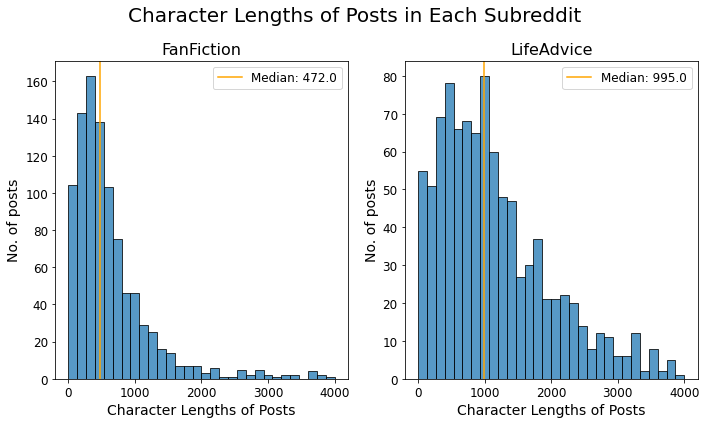

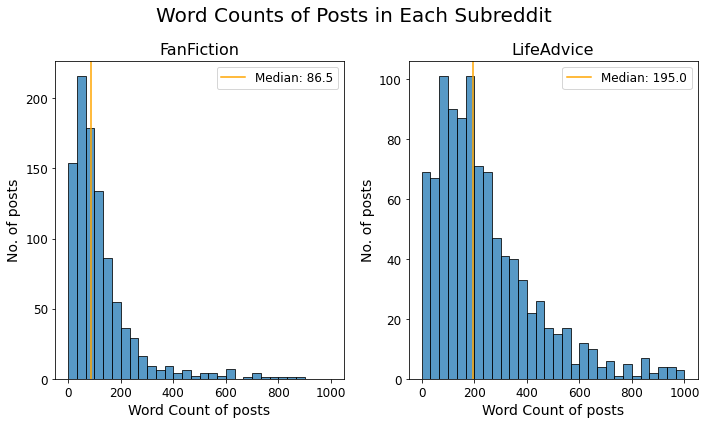

In [47]:
# Histplots of posts length for both subreddits 
fig, ax = plt.subplots(1,2,figsize=(10,6),tight_layout=True,)

plot1 = sns.histplot(df_fil_sub0,x="len_all_text",bins= 30,ax = ax[0],binrange=[0, 4000])
plot2 = sns.histplot(df_fil_sub1,x="len_all_text",bins=30,ax = ax[1],binrange= [0, 4000]);

plot1.axvline(x = df_fil_sub0.len_all_text.median(), color = 'orange', label = 'Median: 472.0')
plot2.axvline(x = df_fil_sub1.len_all_text.median(), color = 'orange', label = 'Median: 995.0')
plot1.legend(loc='upper right')
plot2.legend(loc='upper right')
                 
ax[0].set_xlabel('Character Lengths of Posts', fontsize=14)
ax[1].set_xlabel('Character Lengths of Posts', fontsize=14)

ax[0].set_ylabel('No. of posts', fontsize=14)
ax[1].set_ylabel('No. of posts', fontsize=14)

ax[0].set_title('FanFiction', fontsize=16)
ax[1].set_title('LifeAdvice', fontsize=16)

fig.suptitle('Character Lengths of Posts in Each Subreddit', fontsize=20);

# Histplots of wordcounts for both subreddits 
fig, ax = plt.subplots(1,2,figsize=(10,6),tight_layout=True,)

plot3 = sns.histplot(df_fil_sub0,x="wordcount_all_text",bins=30,ax = ax[0],binrange=[0, 1000])
plot4 = sns.histplot(df_fil_sub1,x="wordcount_all_text",bins=30,ax = ax[1],binrange= [0, 1000]);

plot3.axvline(x = df_fil_sub0.wordcount_all_text.median(), color = 'orange',label='Median: 86.5')
plot4.axvline(x = df_fil_sub1.wordcount_all_text.median(), color = 'orange',label='Median: 195.0')
plot3.legend(loc='upper right')
plot4.legend(loc='upper right')

ax[0].set_xlabel('Word Count of posts', fontsize=14)
ax[1].set_xlabel('Word Count of posts', fontsize=14)

ax[0].set_ylabel('No. of posts', fontsize=14)
ax[1].set_ylabel('No. of posts', fontsize=14)

ax[0].set_title('FanFiction', fontsize=16)
ax[1].set_title('LifeAdvice', fontsize=16)

fig.suptitle('Word Counts of Posts in Each Subreddit', fontsize=20);

Based on the plot above, we can see that distributions across the board are right-skewed. While distributions of posts coming from LifeAdvice looking relatively more normal, we can still see a tail to the right for both of them.

As the distribution for both subreddits are right-skewed, we will compare the medians of word count and character lengths for both subreddit. It seems that LiveAdvice subreddit tend to have higher word counts as well as character lengths with higher medians for both columns compared to FanFiction.

Another thing of note is to see the differences in magnitudes, we have  magnitudes ranging in the hundreds and thousands. If we were considering to use K-nearest neighbors (KNN) with a Euclidean distance measure, we have to take note that [KNN is sensitive to magnitudes and hence these features should be scaled for them to be weighed equally](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35).

### Text Columns

We will now explore the text columns. To do so, we will count-vectorize all_text to obtain the frequency of word occurence and see if the most frequent words differ between the two subreddits.

#### (CountVectorizer) Generating Top 15 most occurring words in posts of both subreddits

In [48]:
#Instantiate CountVectorizer
cvec = CountVectorizer(max_features=1000, stop_words = 'english')
# Fit and transform the all_text of the fanfic subreddit
all_text_cvec = cvec.fit_transform(df_fil_sub0['all_text'])
# Put the transformed all_text into a DataFrame
all_text_df_sub0 = pd.DataFrame(all_text_cvec.todense(), columns = cvec.get_feature_names())
# Show the top 15 words in posts of fanfic subreddit
all_text_df_sub0.sum().sort_values(ascending=False)[:15]
# Click the ... bubble below to see the top 15 words in occurence in posts of FanFiction

fic          775
just         692
like         678
writing      456
don          417
story        406
ve           374
write        367
fics         359
know         357
read         312
really       306
character    300
want         297
people       279
dtype: int64

In [49]:
#Instantiate CountVectorizer
cvec2 = CountVectorizer(max_features=1000, stop_words = 'english')
# Fit and transform the all_text of the lifeadvice subreddit
all_text_cvec2 = cvec2.fit_transform(df_fil_sub1['all_text'])
# Put the transformed all_text into a DataFrame
all_text_df_sub1 = pd.DataFrame(all_text_cvec2.todense(), columns = cvec2.get_feature_names())
# Show the top 15 words in posts of lifeadvice subreddit
all_text_df_sub1.sum().sort_values(ascending=False)[:15]
# Click the ... bubble below to see the top 15 words in occurence from posts of Lifeadvice

just      1638
like      1546
don       1434
feel      1161
know      1124
want      1113
life      1075
time      1029
ve         995
job        924
amp        890
x200b      852
really     840
work       765
years      573
dtype: int64

#### (CountVectorizer) Generating Top 15 most occurring bigrams in posts of both subreddits

In [50]:
#Instantiate CountVectorizer
cvec3 = CountVectorizer(max_features=1000, stop_words = 'english',ngram_range=(2,2))
# Fit and transform the all_text of the fanfic subreddit
all_text_cvec3 = cvec3.fit_transform(df_fil_sub0['all_text'])
# Put the transformed all_text into a DataFrame
all_text_df2_sub0 = pd.DataFrame(all_text_cvec3.todense(), columns = cvec3.get_feature_names())
# Show the top 15 bigrams in posts of fanfic subreddit
all_text_df2_sub0.sum().sort_values(ascending=False)[:15]
# Click the ... bubble below to see the top 15 bigrams in occurence from posts of FanFiction

fic favorite      150
favorite fic      149
feel like          83
don know           81
https www          56
don want           54
reddit com         47
www reddit         46
harry potter       43
want write         39
main character     38
ve seen            37
amp x200b          37
fanfiction net     32
word count         27
dtype: int64

In [51]:
#Instantiate CountVectorizer
cvec4 = CountVectorizer(max_features=1000, stop_words = 'english',ngram_range=(2,2))
# Fit and transform the all_text of the fanfic subreddit
all_text_cvec4 = cvec4.fit_transform(df_fil_sub1['all_text'])
# Put the transformed all_text into a DataFrame
all_text_df2_sub1 = pd.DataFrame(all_text_cvec4.todense(), columns = cvec4.get_feature_names())
# Show the top 15 bigrams in posts of fanfic subreddit
all_text_df2_sub1.sum().sort_values(ascending=False)[:15]
# Click the ... bubble below to see the top 15 bigrams in occurence from posts of Lifeadvice

amp x200b        852
x200b amp        764
feel like        500
don know         498
don want         232
high school      113
just want         99
just don          97
just feel         80
years old         77
feels like        72
mental health     70
don really        63
year old          61
don think         57
dtype: int64

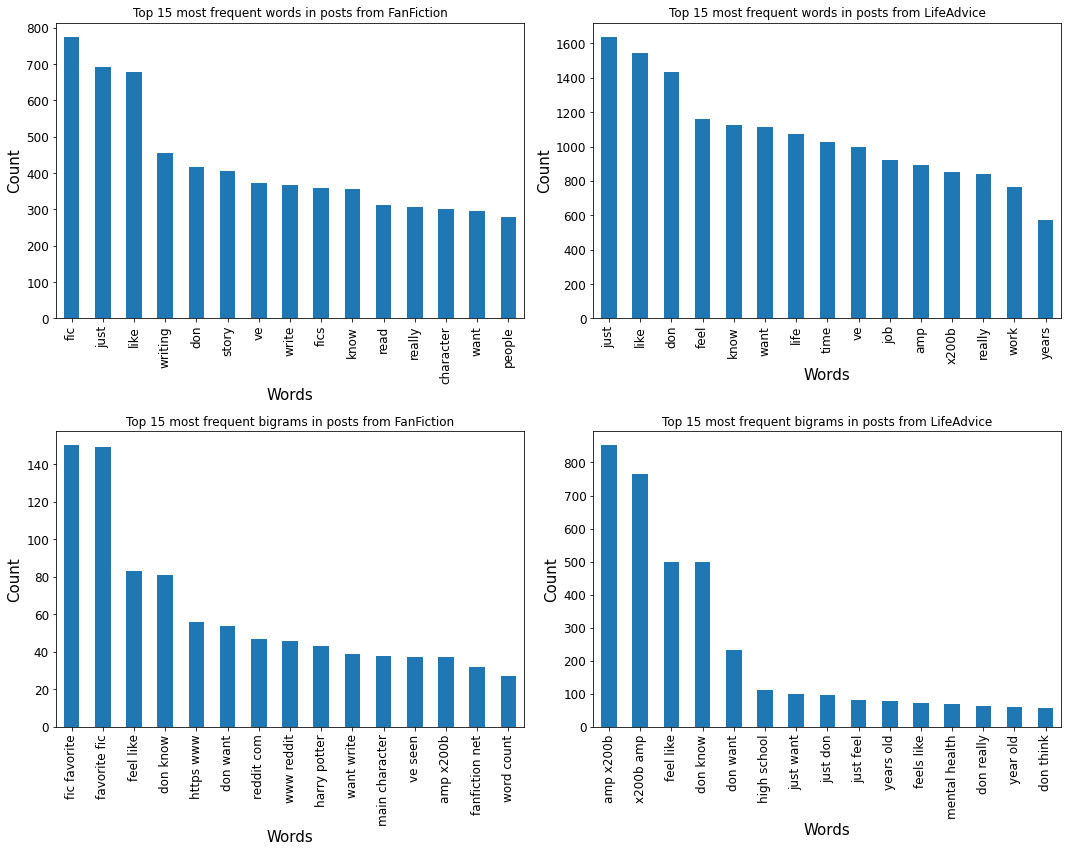

In [52]:
# Instantiate figure and subplots to vizualize the top 15 words
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12), sharey=False)
ax = ax.flatten()

# Bar chart for frequent words in each subreddit
all_text_df_sub0.sum().sort_values(ascending=False)[:15].plot(kind='bar',ax=ax[0]);
ax[0].title.set_text('Top 15 most frequent words in posts from FanFiction')
ax[0].set_xlabel('Words')
ax[0].set_ylabel('Count')

all_text_df_sub1.sum().sort_values(ascending=False)[:15].plot(kind='bar',ax=ax[1]);
ax[1].title.set_text('Top 15 most frequent words in posts from LifeAdvice')
ax[1].set_xlabel('Words')
ax[1].set_ylabel('Count');

# Bar chart for frequent bigrams in each subreddit
all_text_df2_sub0.sum().sort_values(ascending=False)[:15].plot(kind='bar',ax=ax[2]);
ax[2].title.set_text('Top 15 most frequent bigrams in posts from FanFiction')
ax[2].set_xlabel('Words')
ax[2].set_ylabel('Count')

# Bar chart for frequent words in each subreddit
all_text_df2_sub1.sum().sort_values(ascending=False)[:15].plot(kind='bar',ax=ax[3]);
ax[3].title.set_text('Top 15 most frequent bigrams in posts from LifeAdvice')
ax[3].set_xlabel('Words')
ax[3].set_ylabel('Count');

# Allow figure to adjust spacing
fig.tight_layout()

The most common words ```just```,```like```,```don```,```really``` and ```know``` appear in both subreddits, there are also differentiating words which appear in one but not the other:
- FanFiction:   ```Writing```, ```Character```, ```Story```
- LifeAdvice:   ```Job```, ```Work```, ```Time```

Bigrams were also similar across subreddits, with ```feel like```, ```don know``` and ```don want``` appearing in both subreddits. There were also differentiating bigrams.

- FanFiction:   ```harry potter```, ```main character ```, ```word count```
- LifeAdvice:   ```mental health```, ```high school```, ```year old```

Additionally, we also see that there is an imbalance of the most frequent words, we might want to employ the TfidfVectorizer to help us reduce the disparity between the words.

#### (TfidfVectorizer) Generating Top 15 most occurring words in posts of both subreddits

In [53]:
# Instantiate TfidfVectorizer
tvec = TfidfVectorizer(max_features=1000, stop_words = 'english')
# Fit and transform the all_text of the fanfic subreddit
all_text_tvec = tvec.fit_transform(df_fil_sub0['all_text'])
# Put the transformed all_text into a DataFrame
all_text_df_sub0 = pd.DataFrame(all_text_tvec.todense(), columns = tvec.get_feature_names())
# Show the top 15 words in posts of fanfic subreddit
all_text_df_sub0.sum().sort_values(ascending=False)[:15]
# Click the ... bubble below to see the top 15 words in occurence in posts of FanFiction

fic           47.204398
just          41.195640
like          40.320955
writing       33.828305
fics          32.209719
write         31.010685
story         30.210750
don           29.048498
ve            28.206974
know          27.715660
read          25.501067
fanfiction    24.929133
character     24.887021
fanfic        24.835891
want          24.044213
dtype: float64

In [54]:
# Instantiate TfidfVectorizer
tvec2 = TfidfVectorizer(max_features=1000, stop_words = 'english')
# Fit and transform the all_text of the lifeadvice subreddit
all_text_tvec2 = tvec2.fit_transform(df_fil_sub1['all_text'])
# Put the transformed all_text into a DataFrame
all_text_df_sub1 = pd.DataFrame(all_text_tvec2.todense(), columns = tvec2.get_feature_names())
# Show the top 15 words in posts of lifeadvice subreddit
all_text_df_sub1.sum().sort_values(ascending=False)[:15]
# Click the ... bubble below to see the top 15 words in occurence from posts of Lifeadvice

don       59.075744
just      58.712807
like      56.602402
feel      49.972103
life      49.182533
know      47.773110
want      46.354274
job       46.248634
ve        43.868853
time      40.274517
really    37.273588
work      36.878367
people    30.829009
school    30.275801
help      29.985028
dtype: float64

#### (TfidfVectorizer) Generating Top 15 most occurring bigrams in posts of both subreddits

In [55]:
# Instantiate TfidfVectorizer
tvec3 = TfidfVectorizer(max_features=1000, stop_words = 'english', ngram_range=(2,2))
# Fit and transform the all_text of the lifeadvice subreddit
all_text_tvec3 = tvec3.fit_transform(df_fil_sub0['all_text'])
# Put the transformed all_text into a DataFrame
all_text_df2_sub0 = pd.DataFrame(all_text_tvec3.todense(), columns = tvec3.get_feature_names())
# Show the top 15 words in posts of lifeadvice subreddit
all_text_df2_sub0.sum().sort_values(ascending=False)[:15]
# Click the ... bubble below to see the top 15 words in occurence from posts of Lifeadvice

don know          19.421663
feel like         18.382225
ve seen           14.633968
don want          13.928469
fanfiction net    13.004469
main character    12.158173
https www         11.487617
want write        10.547810
reddit com        10.136716
www reddit         9.899619
harry potter       9.829754
amp x200b          9.013649
fan fiction        8.291605
view poll          8.250173
com poll           8.250173
dtype: float64

In [56]:
# Instantiate TfidfVectorizer
tvec4 = TfidfVectorizer(max_features=1000, stop_words = 'english', ngram_range=(2,2))
# Fit and transform the all_text of the lifeadvice subreddit
all_text_tvec4 = tvec4.fit_transform(df_fil_sub1['all_text'])
# Put the transformed all_text into a DataFrame
all_text_df2_sub1 = pd.DataFrame(all_text_tvec4.todense(), columns = tvec4.get_feature_names())
# Show the top 15 words in posts of lifeadvice subreddit
all_text_df2_sub1.sum().sort_values(ascending=False)[:15]
# Click the ... bubble below to see the top 15 words in occurence from posts of Lifeadvice

don know         56.920038
feel like        55.260945
don want         31.813806
high school      20.995906
just want        17.491331
just don         15.900555
need help        15.294914
years old        14.916484
amp x200b        14.910489
need advice      13.344463
feels like       13.000425
just feel        12.102670
year old         11.960600
mental health    11.727282
don really       11.573980
dtype: float64

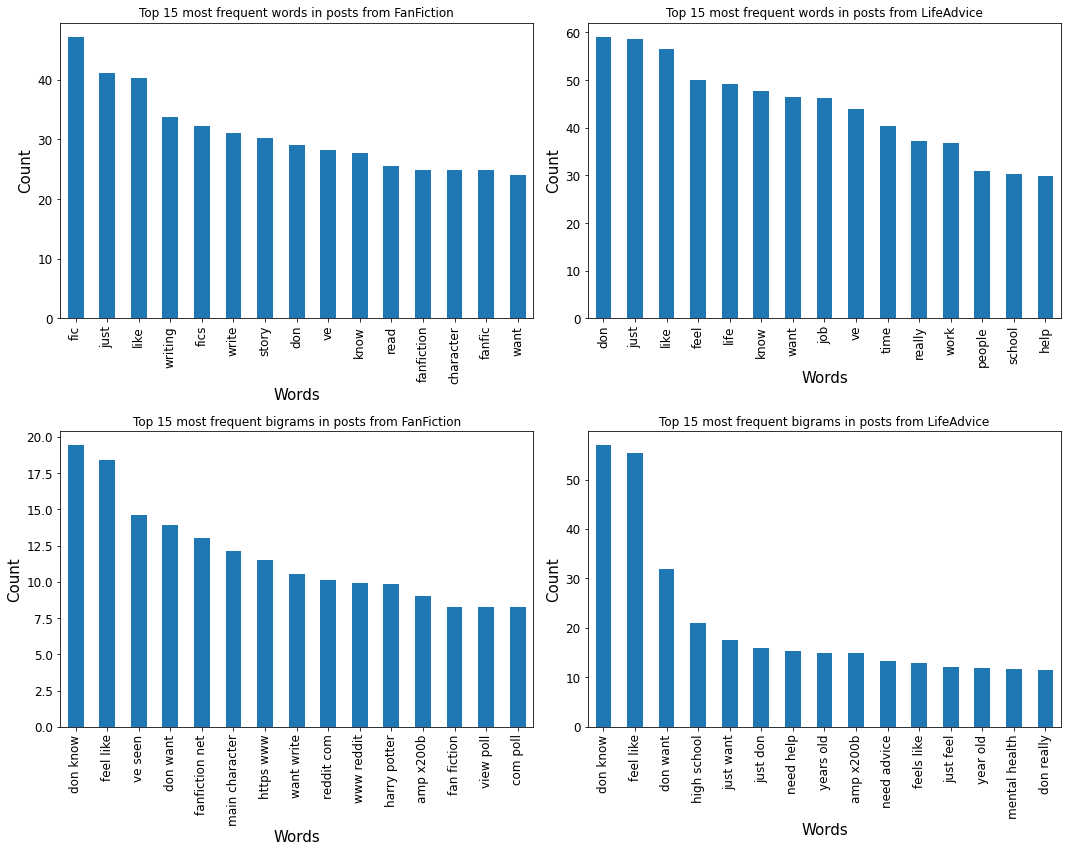

In [57]:
# Instantiate figure and subplots to vizualize the top 15 words
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12), sharey=False)
ax = ax.flatten()

# Bar chart for frequent words in each subreddit
all_text_df_sub0.sum().sort_values(ascending=False)[:15].plot(kind='bar',ax=ax[0]);
ax[0].title.set_text('Top 15 most frequent words in posts from FanFiction')
ax[0].set_xlabel('Words')
ax[0].set_ylabel('Count')

all_text_df_sub1.sum().sort_values(ascending=False)[:15].plot(kind='bar',ax=ax[1]);
ax[1].title.set_text('Top 15 most frequent words in posts from LifeAdvice')
ax[1].set_xlabel('Words')
ax[1].set_ylabel('Count');

# Bar chart for frequent bigrams in each subreddit
all_text_df2_sub0.sum().sort_values(ascending=False)[:15].plot(kind='bar',ax=ax[2]);
ax[2].title.set_text('Top 15 most frequent bigrams in posts from FanFiction')
ax[2].set_xlabel('Words')
ax[2].set_ylabel('Count')

# Bar chart for frequent words in each subreddit
all_text_df2_sub1.sum().sort_values(ascending=False)[:15].plot(kind='bar',ax=ax[3]);
ax[3].title.set_text('Top 15 most frequent bigrams in posts from LifeAdvice')
ax[3].set_xlabel('Words')
ax[3].set_ylabel('Count');

# Allow figure to adjust spacing
fig.tight_layout()

With the TfidfVectorizer, we managed to 'shrink' the range of values of our y-axis, from approximately 800,1600,140,800 to approximately 50,60,20,50 respectively. We managed to reduce the disparity from across hundreds and thousands to just tens.

We also notice some words which we should include in the stop_words list on top of the default stop words, these are unicode texts (```amp```, ```x200b```) and words like ```reddit```, ```www```, ```https``` and ```com``` which related to websites and words that directly relate to each subreddit like ```fan```, ```fiction```,```fic```,```life```,```advice```, etc.

### Exporting dataframe into notebook

In [63]:
master_df.to_csv('../datasets/master.csv', index = False)

In [65]:
master_df.columns

Index(['selftext', 'title', 'id', 'subreddit', 'author', 'score',
       'upvote_ratio', 'total_awards_received', 'num_comments', 'permalink',
       'created_utc', 'subreddit_cat', 'timestamp', 'day_posted',
       'time_posted', 'month_posted', 'weekday_posted', 'hour_posted',
       'all_text', 'wordcount_all_text', 'len_all_text'],
      dtype='object')

--- End of Notebook ---

---
